Tutorial for using trackpy:
http://soft-matter.github.io/trackpy/v0.3.0/tutorial/walkthrough.html

In [18]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# the following line only works in an IPython notebook
%matplotlib notebook

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')

In [19]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

In [241]:
frames = pims.ImageSequence('../data/huganir/tp*_results0001.tif', as_grey=True)

In [242]:
# tp1 = pims.TiffStack('../data/tp1_results.tiff', as_grey=True)
# tp2 = pims.TiffStack('../data/tp2_results.tiff', as_grey=True)
# tp3 = pims.TiffStack('../data/tp3_results.tiff', as_grey=True)
# tp4 = pims.TiffStack('../data/tp4_results.tiff', as_grey=True)

In [243]:
# depth = min(len(tp1), len(tp2), len(tp3), len(tp4))
# print(depth)

In [244]:
# layers = [[tp1[i], tp2[i], tp3[i], tp4[i]] for i in range(depth)]

Frame([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)
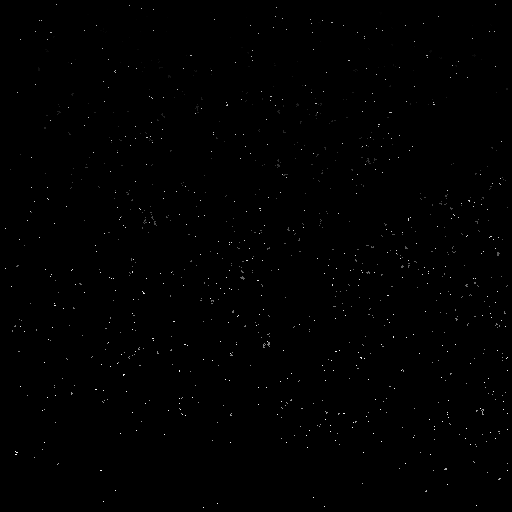

In [245]:
frames[0]

Frame([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)
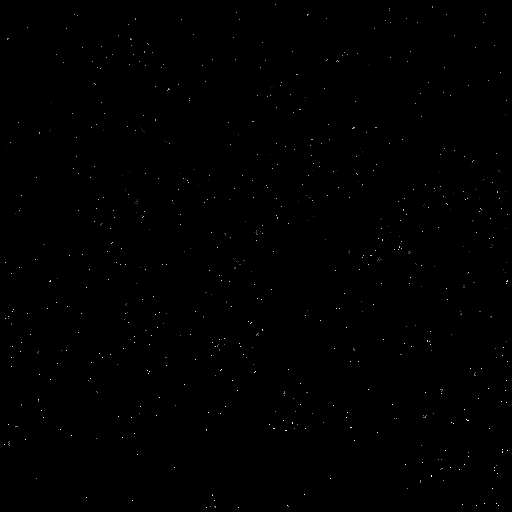

In [246]:
frames[1]

In [259]:
f = tp.locate(frames[1], 15)

In [260]:
f.head() # shows the first few rows of data

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,9.000000,902.000000,1268.958775,1.276448,0.213031,222.853291,1438.0,0.0,1
1,11.412014,474.000000,5985.168646,1.635347,0.032376,645.742492,7195.0,0.0,1
2,13.773110,864.550151,10416.267125,1.820103,0.151722,838.657896,12960.0,0.0,1
3,12.004989,550.499168,2323.772982,3.344487,0.805773,217.321003,2878.0,0.0,1
4,18.000000,65.000000,1274.782237,1.276721,0.212951,223.806221,1444.0,0.0,1


<IPython.core.display.Javascript object>


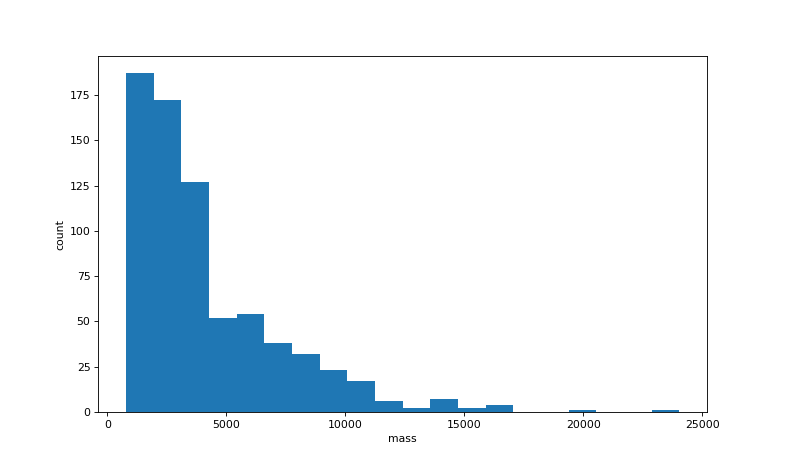

[Text(0,0.5,'count'), Text(0.5,0,'mass')]

In [261]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count')

In [262]:
np.median(f['mass'])

3139.5340849014874

In [267]:
f = tp.locate(frames[1], 15)
f = tp.locate(frames[1], 15, np.median(f['mass']))

<IPython.core.display.Javascript object>


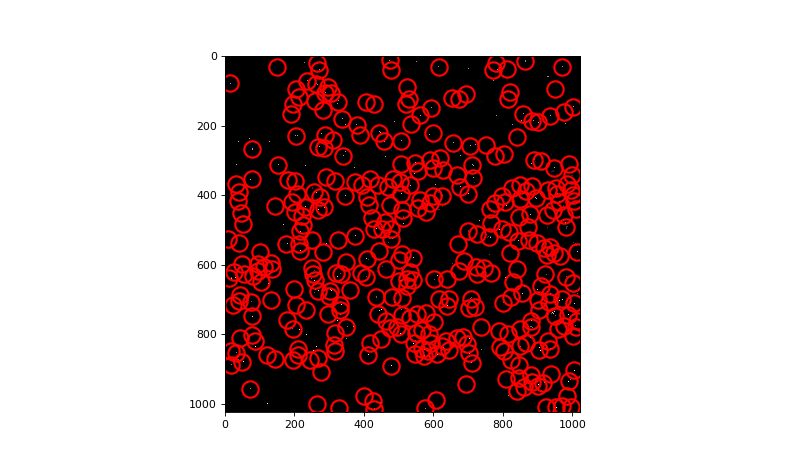

In [268]:
plt.figure()
tp.annotate(f, frames[1])

<IPython.core.display.Javascript object>


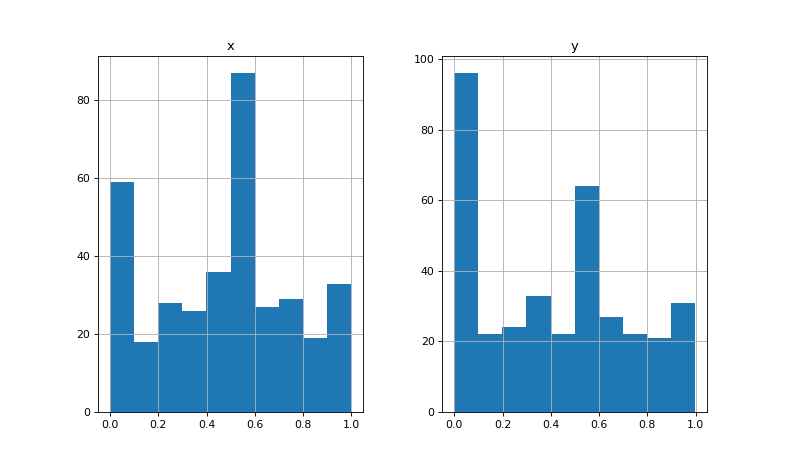

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7504788d68>,
      dtype=object)

In [265]:
tp.subpx_bias(f)

In [270]:
f = tp.batch(frames, 15, minmass=1000)

Frame 3: 776 features


In [286]:
t = tp.link_df(f, 10, memory=2)

Frame 3: 776 trajectories present.


In [287]:
t.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,8.014915,266.518446,4200.956813,1.462872,0.301526,616.691345,4996.0,0.000041,0,0
552,632.616309,538.899151,7956.435487,3.360831,0.512404,556.382202,11901.0,0.000017,0,1
553,633.906293,618.581003,11826.096773,1.997174,0.253284,1038.491063,15417.0,0.000013,0,2
554,632.501035,691.500318,5475.989241,2.082774,0.405040,505.665855,6670.0,0.000031,0,3
555,635.445950,746.742760,14315.731056,2.430925,0.241905,975.308129,20624.0,0.000010,0,4


In [301]:
t1 = tp.filter_stubs(t, 3)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 2079
After: 211


<IPython.core.display.Javascript object>


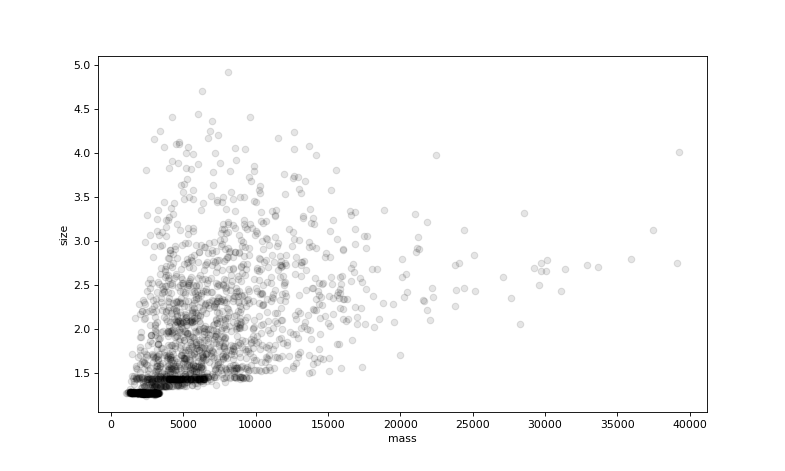

In [303]:
plt.figure()
tp.mass_size(t.groupby('particle').mean())  # convenience function -- just plots size vs. mass

<IPython.core.display.Javascript object>


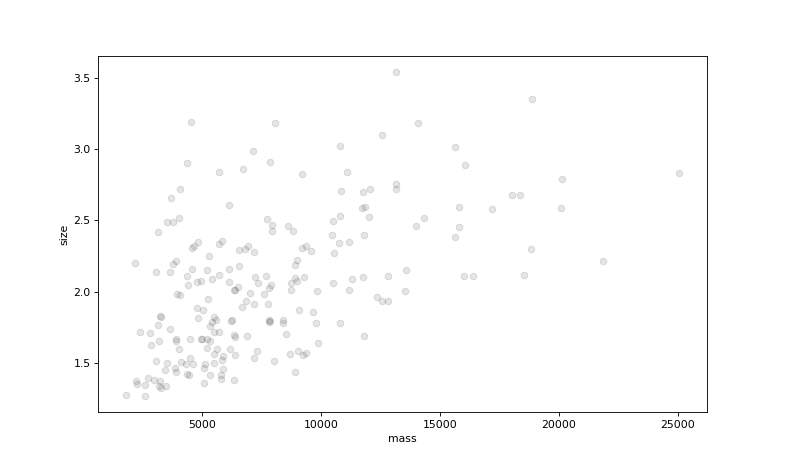

In [304]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean())  # convenience function -- just plots size vs. mass

<IPython.core.display.Javascript object>


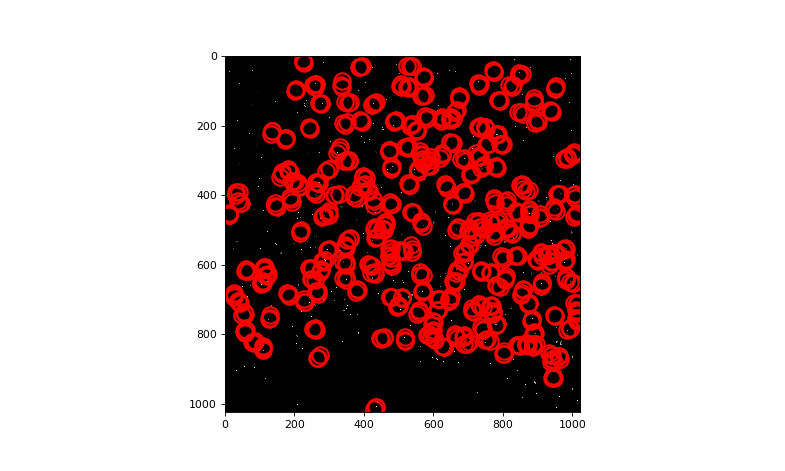

In [311]:
plt.figure()
tp.annotate(t1, frames[0])

<IPython.core.display.Javascript object>


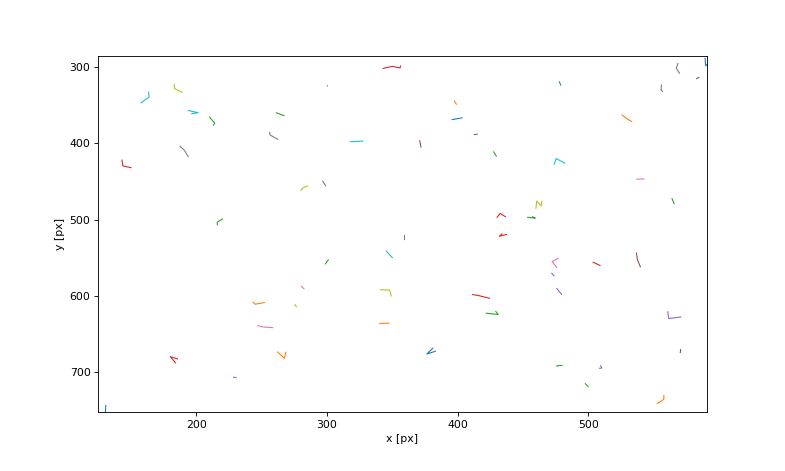

In [317]:
plt.figure()
tp.plot_traj(t1)

In [318]:
d = tp.compute_drift(t1)

/home/dli/anaconda2/envs/lids/lib/python3.6/site-packages/trackpy/motion.py:289: FutureWarning: 'frame' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  dx = f_diff.loc[mask, pos_columns + ['frame']].groupby('frame').mean()


<IPython.core.display.Javascript object>


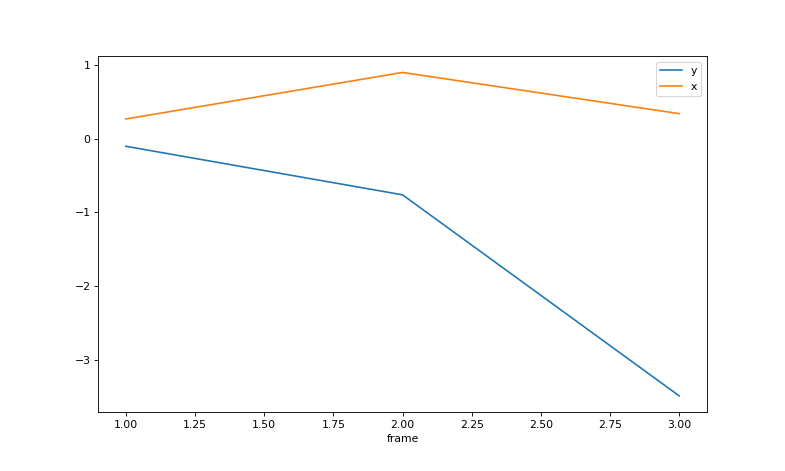

In [319]:
d.plot()

In [320]:
tm = tp.subtract_drift(t1, d)

<IPython.core.display.Javascript object>


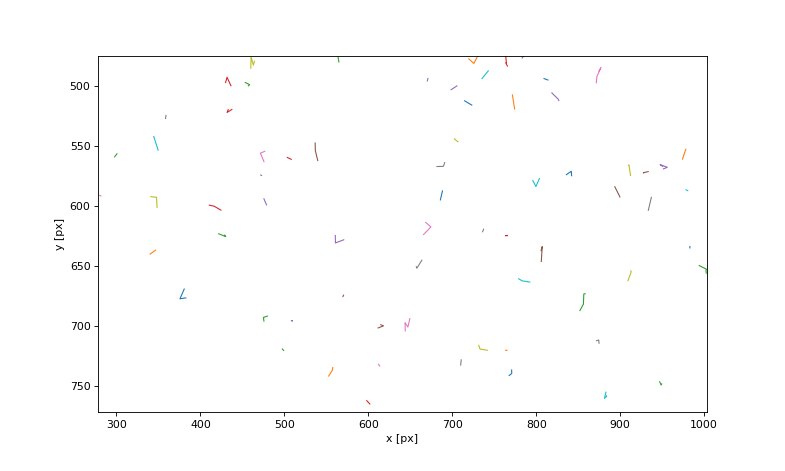

In [321]:
plt.figure()
tp.plot_traj(tm)

In [327]:
im = tp.imsd(tm, 0.09, 24)  # microns per pixel = 100/285., frames per second = 24

<IPython.core.display.Javascript object>


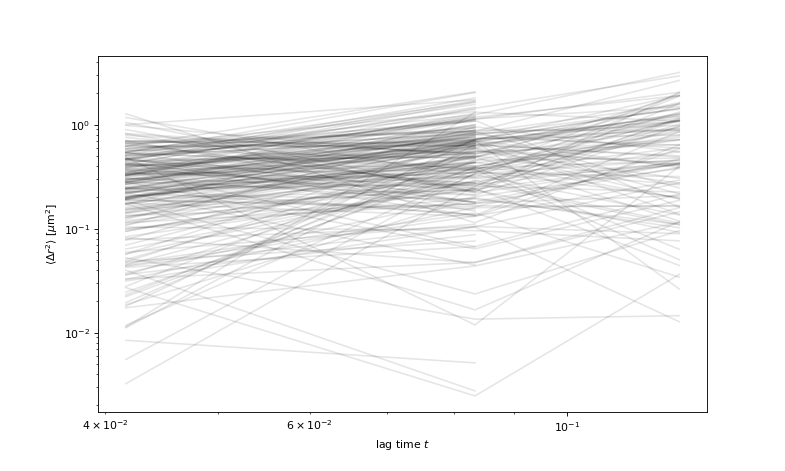

In [328]:
fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.1)  # black lines, semitransparent
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set_xscale('log')
ax.set_yscale('log')

In [329]:
em = tp.emsd(tm, 0.09, 24)

<IPython.core.display.Javascript object>


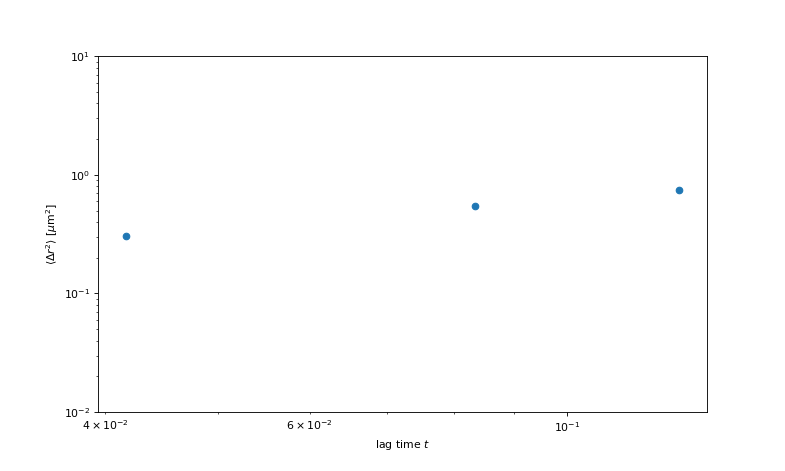

[(0.01, 10)]

In [330]:
fig, ax = plt.subplots()
ax.plot(em.index, em, 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set(ylim=(1e-2, 10))

<IPython.core.display.Javascript object>


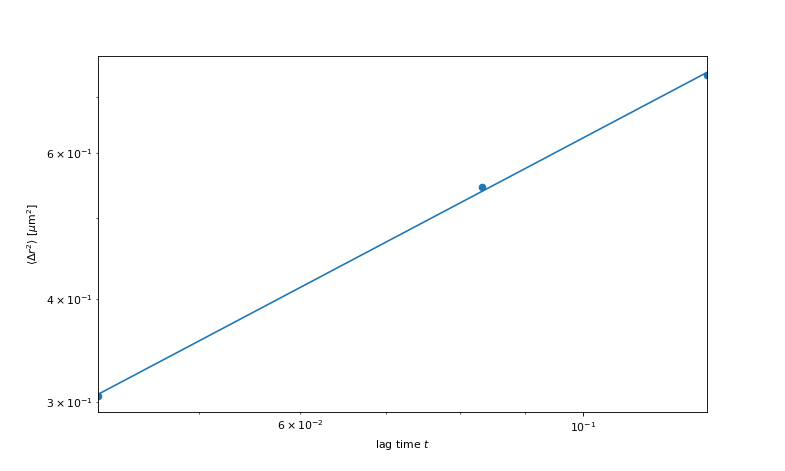

Text(0.5,0,'lag time $t$')

In [331]:
plt.figure()
tp.utils.fit_powerlaw(em)  # performs linear best fit in log space, plots
plt.ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
plt.xlabel('lag time $t$')